__Goal:__ Testing the difference between using the deflection derived analytically and the  obtained by MGE decomposition.

The MGE paramerization can be found in */home/carlos/Documents/GitHub/Master-Degree/NFW_MGE_Parametrization/SDP81/NFW*

For that model, we are used:

$\kappa_s = 1.00$ 

$r_s = 11.5 ''$

$ z_l = 0.299 \, ,z_s = 3.100$

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from jampy import quadva
import astropy.units as u
import time

import autolens as al
import autolens.plot as aplt

from astropy.cosmology import Planck15 as cosmo


In [139]:
#Analytical deflection angle
def sNFW(grid, r_s, kappa_s):
    
    R = np.sqrt(  grid[:,1]**2 + grid[:,0]**2  )/r_s
    g_ = np.empty_like(R)
    
    r = R[R > 1]
    g_[R > 1] =  np.log( r * 0.5 ) + ( 1/( np.sqrt( r**2 - 1 ) ) ) * np.arctan( np.sqrt( r**2 - 1 ) )
    
    r = R[R == 1]
    g_[R == 1] =  1 + np.log(0.5)
    
    r = R[R < 1]
    g_[R < 1] =  np.log( r * 0.5 ) + ( 1/( np.sqrt( 1 - r**2 ) ) ) * np.arctanh( np.sqrt( 1 - r**2 ) )                           
    
    theta = np.arctan2(grid[:,0],grid[:,1])
    cos_theta, sin_theta = np.cos(theta), np.sin(theta)
    radial_deflection = ( 4 * kappa_s * r_s * g_ )/R
    
    return radial_deflection * sin_theta,  radial_deflection * cos_theta

## MGE parametrization until 2''

In [249]:
#MGE decomposition
surf_dm, sigma_dm , qobs_dm   = np.loadtxt("SphNFW_2arcsec.txt", unpack=True)   #Spherical NFW
grid = np.loadtxt("AutolensGrid.txt")

#Lensing parameters
z_l    = 0.299                                                         #Lens Redshift
z_s    = 3.100                                                         #Source Redshift 
D_l    = cosmo.angular_diameter_distance(z_l).value                    #Distance to lens [Mpc] 
r_s    = 11.5                                                          #Scale radius [arcsec]
kappa  = 1.00                                                          #Surface mass scale [ad]

In [250]:
#MGE model
#Initializing
mass_profile = al.mp.MGE()
#Components
mass_profile.MGE_comps(z_l=z_l, z_s=z_s, 
                       surf_lum=surf_dm, sigma_lum=sigma_dm, qobs_lum=qobs_dm, ml=1)
result_MGE = mass_profile.deflections_from_grid(grid)

In [251]:
#Analytical
result_analytical = sNFW(grid, kappa_s=kappa, r_s=r_s)

Text(0, 0.5, 'Fraction  $\\, \\alpha_x$(MGE/analytical)')

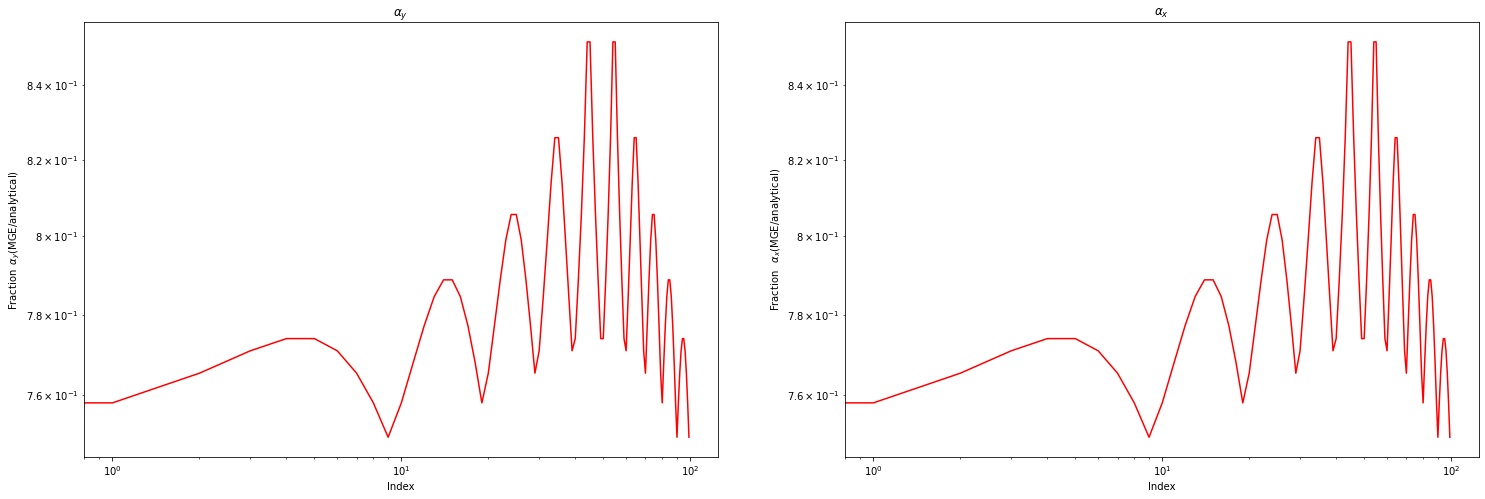

In [252]:
plt.figure(figsize=(25,8))

plt.subplot(121)
plt.title("$\\alpha_y$")
plt.loglog(result_MGE[:,0]/result_analytical[0], "r")
plt.xlabel("Index")
plt.ylabel("Fraction $\, \\alpha_y$(MGE/analytical)")

plt.subplot(122)
plt.title("$\\alpha_x$")
plt.loglog(result_MGE[:,1]/result_analytical[1], "r")
plt.xlabel("Index")
plt.ylabel("Fraction  $\, \\alpha_x$(MGE/analytical)")


## MGE parametrization until 2e3''

In [243]:
#MGE decomposition
surf_dm, sigma_dm , qobs_dm   = np.loadtxt("SphNFW_2e3arcsec.txt", unpack=True)   #Spherical NFW
grid = np.loadtxt("AutolensGrid.txt")

#Lensing parameters
z_l    = 0.299                                                         #Lens Redshift
z_s    = 3.100                                                         #Source Redshift 
D_l    = cosmo.angular_diameter_distance(z_l).value                    #Distance to lens [Mpc] 
r_s    = 11.5                                                          #Scale radius [arcsec]
kappa  = 1.00    

In [244]:
#MGE model
#Initializing
mass_profile = al.mp.MGE()
#Components
mass_profile.MGE_comps(z_l=z_l, z_s=z_s, 
                       surf_lum=surf_dm, sigma_lum=sigma_dm, qobs_lum=qobs_dm, ml=1)
result_MGE = mass_profile.deflections_from_grid(grid)

In [245]:
#Analytical
result_analytical = sNFW(grid, kappa_s=kappa, r_s=r_s)

Text(0, 0.5, 'Fraction  $\\, \\alpha_x$(MGE/analytical)')

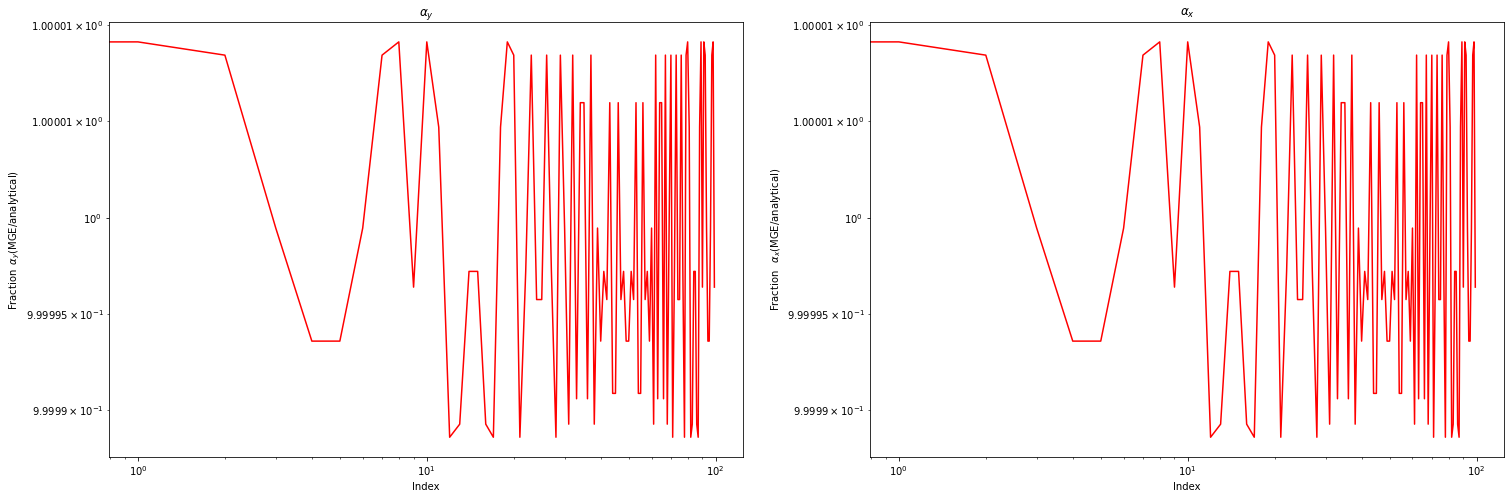

In [247]:
plt.figure(figsize=(25,8))

plt.subplot(121)
plt.title("$\\alpha_y$")
plt.loglog(result_MGE[:,0]/result_analytical[0], "r")
plt.xlabel("Index")
plt.ylabel("Fraction $\, \\alpha_y$(MGE/analytical)")

plt.subplot(122)
plt.title("$\\alpha_x$")
plt.loglog(result_MGE[:,1]/result_analytical[1], "r")
plt.xlabel("Index")
plt.ylabel("Fraction  $\, \\alpha_x$(MGE/analytical)")